In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
from nets_benchmarking import results_daa
warnings.filterwarnings('ignore') # suppresses warnings that arise because original code uses ...
# ... deprecated tf version after first execution of cell 
res_filename = 'results_original'
datadict= results_daa.create_data()
for i in range(1):
    if i<10:  anneal = 0
    if i>=10: anneal = 1
    results_daa.collect_results(data = datadict,
                    into = res_filename, 
                    version = 'luigi', 
                    at_loss_factor=1.0, 
                    target_loss_factor=1.0,
                    recon_loss_factor=1.0,
                    kl_loss_factor=1.0,
                    anneal = anneal)


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4)            12          encoder_input_x[0][0]            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4)            20          dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 3)            15          dense_1[0][0]                    
____________________________________________________________________________________________

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
encoder_input_y (InputLayer)    [(None, 3)]          0                                            
__________________________________________________________________________________________________
encoder (Model)                 multiple             84          encoder_input_x[0][0]            
                                                                 encoder_input_y[0][0]            
__________________________________________________________________________________________________
decoder (Model)                 [(None, 2), (None, 3 75          encoder[1][0]                  

100000/100000 [==============================] - 1s 10us/sample - loss: 2.4047 - val_loss: 1.9110
Epoch 2/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.7392 - val_loss: 1.6730
Epoch 3/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.6572 - val_loss: 1.6412
Epoch 4/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6372 - val_loss: 1.6289
Epoch 5/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6288 - val_loss: 1.6233
Epoch 6/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6248 - val_loss: 1.6204
Epoch 7/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.6228 - val_loss: 1.6191
Epoch 8/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.6217 - val_loss: 1.6184
Epoch 9/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6212 - val_loss: 1.6183
Epoch 10/100
100000/100000 [==

100000/100000 [==============================] - 0s 3us/sample - loss: 1.6208 - val_loss: 1.6178
Epoch 76/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6208 - val_loss: 1.6179
Epoch 77/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6208 - val_loss: 1.6179
Epoch 78/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6208 - val_loss: 1.6179
Epoch 79/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6208 - val_loss: 1.6177
Epoch 80/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6208 - val_loss: 1.6177
Epoch 81/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.6208 - val_loss: 1.6178
Epoch 82/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.6208 - val_loss: 1.6180
Epoch 83/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6208 - val_loss: 1.6179
Epoch 84/100
100000/100

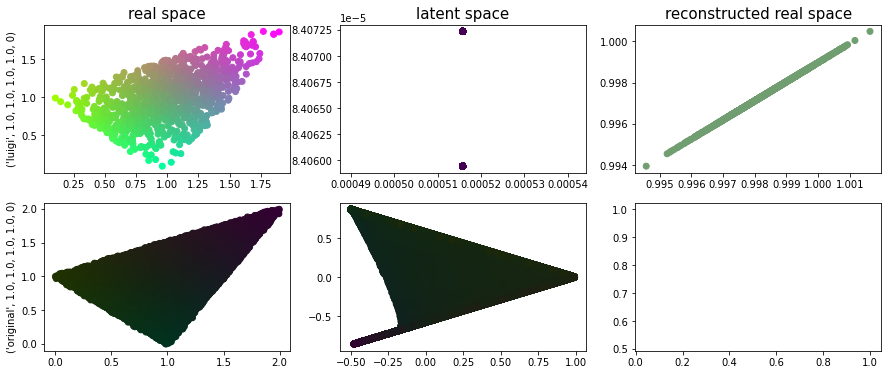

In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
from nets_benchmarking import  results_daa
#res_filename = 'results_luigi'
results_daa.plot_results(res_filename)